---
title: Savitzky–Golay
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

The Savitzky-Golay filter, also known as [LOESS](https://en.wikipedia.org/wiki/Local_regression), smoothes a noisy signal by performing a polynomial fit over a sliding window. 

Polynomial fit of order 3, window size = 51 pts
<div style="display: flex; justify-content: center;">
<iframe width="650" height="366" src="https://www.youtube.com/embed/6mEzPkOcITk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</div>

Polynomial fit of order 2, window size = 51 pts
<div style="display: flex; justify-content: center;">
<iframe width="650" height="366" src="https://www.youtube.com/embed/QpSXv8AyLzY" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</div>

The simulations look different because the order of the polynomial makes a very different impression on us, but in reality the outcome of the two filtering is almost identical:

In [1]:
#| code-summary: "import stuff"
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import datetime as dt
import matplotlib.ticker as ticker
from scipy.signal import savgol_filter
import os
import warnings
import scipy
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)  # white graphs, with large and legible letters
# %matplotlib widget

In [2]:
#| code-summary: "define useful functions"
# dirty trick to have dates in the middle of the 24-hour period
# make minor ticks in the middle, put the labels there!
# from https://matplotlib.org/stable/gallery/ticks/centered_ticklabels.html

def centered_dates(ax):
    date_form = DateFormatter("%d %b")  # %d 3-letter-Month
    # major ticks at midnight, every day
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
    ax.xaxis.set_major_formatter(date_form)
    # minor ticks at noon, every day
    ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=[12]))
    # erase major tick labels
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    # set minor tick labels as define above
    ax.xaxis.set_minor_formatter(date_form)
    # completely erase minor ticks, center tick labels
    for tick in ax.xaxis.get_minor_ticks():
        tick.tick1line.set_markersize(0)
        tick.tick2line.set_markersize(0)
        tick.label1.set_horizontalalignment('center')

In [3]:
#| code-summary: "load data"
df = pd.read_csv('shani_2022_january.csv', parse_dates=['date'], index_col='date')
start = "2022-01-02"
end = "2022-01-05"
df = df.loc[start:end]

In [4]:
#| code-fold: false
df['sg_3_51'] = savgol_filter(df['TD'], window_length=51, polyorder=3)
df['sg_2_51'] = savgol_filter(df['TD'], window_length=51, polyorder=2)

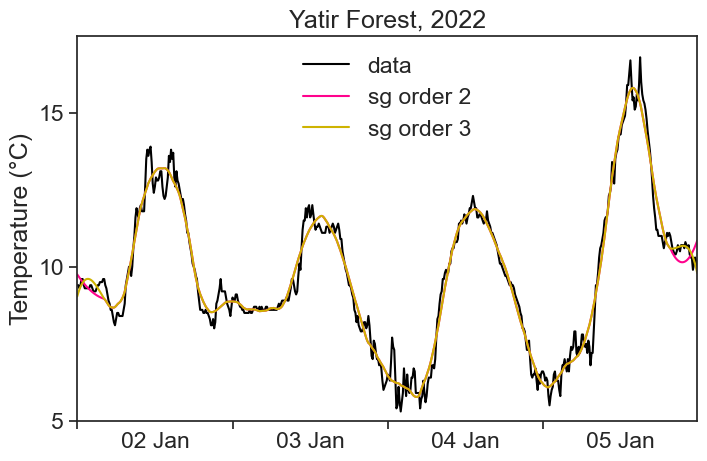

In [5]:
#| code-summary: "plot temperature data"
fig, ax = plt.subplots(figsize=(8,5))

plot_data, = ax.plot(df['TD'], color='black')
plot_sg2, = ax.plot(df['sg_2_51'], color='xkcd:hot pink')
plot_sg3, = ax.plot(df['sg_3_51'], color='xkcd:mustard')

ax.legend(handles=[plot_data, plot_sg2, plot_sg3],
          labels=['data', 'sg order 2', 'sg order 3'],
          frameon=False)

plot_settings = {
    'ylim': [5, 17.5],
    'xlim': [df.index[0], df.index[-1]],
    'ylabel': "Temperature (°C)",
    'title': "Yatir Forest, 2022",
    'yticks': [5, 10, 15]
}

ax.set(**plot_settings)
centered_dates(ax)

To really see the difference between window width and polynomial order, we need to play with their ratio,

$$
\text{ratio} = \frac{w}{p} = \frac{\text{window width}}{\text{polynomial order}}
$$

In [6]:
#| code-summary: "chose only one day"
start = "2022-01-02 00:00:00"
end = "2022-01-02 23:50:00"
df = df.loc[start:end]

In [7]:
#| code-fold: false
# window_length, polyorder
df['sg_1'] = savgol_filter(df['TD'], 5, 3)
df['sg_2'] = savgol_filter(df['TD'], 11, 2)
df['sg_3'] = savgol_filter(df['TD'], 25, 3)

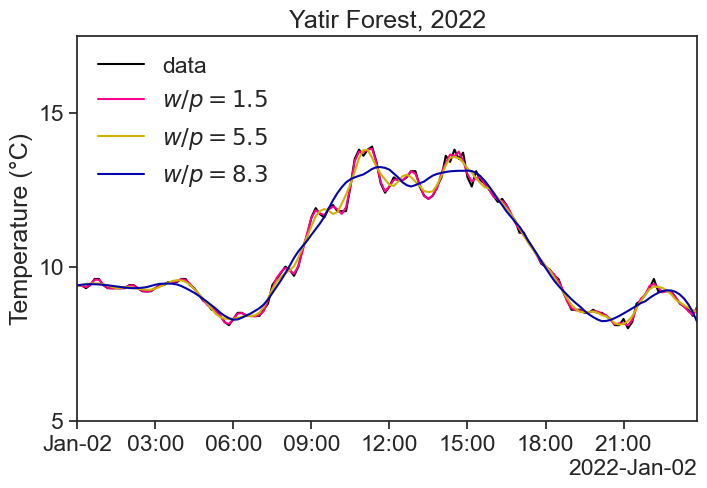

In [8]:
#| code-summary: "compare different ratio choices"
fig, ax = plt.subplots(figsize=(8,5))

plot_data, = ax.plot(df['TD'], color='black')
plot_sg1, = ax.plot(df['sg_1'], color='xkcd:hot pink')
plot_sg2, = ax.plot(df['sg_2'], color='xkcd:mustard')
plot_sg3, = ax.plot(df['sg_3'], color='xkcd:royal blue')

ax.legend(handles=[plot_data, plot_sg1, plot_sg2, plot_sg3],
          labels=['data', r'$w/p=1.5$', r'$w/p=5.5$', r'$w/p=8.3$'],
          frameon=False)

plot_settings = {
    'ylim': [5, 17.5],
    'xlim': [df.index[0], df.index[-1]],
    'ylabel': "Temperature (°C)",
    'title': "Yatir Forest, 2022",
    'yticks': [5, 10, 15]
}

ax.set(**plot_settings)

locator = mdates.AutoDateLocator(minticks=7, maxticks=11)
formatter = mdates.ConciseDateFormatter(locator)

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

The higher the ratio, the more aggressive the smoothing.

There is **a lot** more about the Savitzky-Golay filter, but for our purposes this is enough. If you want some more discussion about how to choose the parameters of the filter, [read this](https://nirpyresearch.com/savitzky-golay-smoothing-method/){target="_blank"}.